In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Unpickling best regression model

redo_pickle = False

if redo_pickle == True:
    with open('lm_reg.pickle','rb') as f:
        lm_reg = pickle.load(f)

In [4]:
# Unpickling column names

redo_pickle = False

if redo_pickle == True:
    with open('column_names.pickle','rb') as f:
        column_names = pickle.load(f)

## Determining the Most Important Features of the Model

In [5]:
ridge_coeffs = [x for x in lm_reg.coef_[0]]

In [6]:
# Looking at how ridge affected the coefficients
ridge_coeffs = list(zip(column_names, ridge_coeffs))

In [7]:
ridge_coeffs

[('Intercept', 0.0),
 ('NPPES_PROVIDER_GENDER[T.M]', 0.017340846134915294),
 ('NPPES_PROVIDER_STATE[T.AL]', -0.046272993355245644),
 ('NPPES_PROVIDER_STATE[T.AR]', -0.034932730831664316),
 ('NPPES_PROVIDER_STATE[T.AZ]', -0.028123141218529664),
 ('NPPES_PROVIDER_STATE[T.CA]', -0.04204328883291163),
 ('NPPES_PROVIDER_STATE[T.CO]', -0.028176981458278582),
 ('NPPES_PROVIDER_STATE[T.CT]', -0.026618015559855684),
 ('NPPES_PROVIDER_STATE[T.DC]', -0.011507908583872923),
 ('NPPES_PROVIDER_STATE[T.DE]', -0.01224697583850492),
 ('NPPES_PROVIDER_STATE[T.FL]', -0.05024217046215995),
 ('NPPES_PROVIDER_STATE[T.GA]', -0.04580909201088803),
 ('NPPES_PROVIDER_STATE[T.HI]', -0.011814259727756838),
 ('NPPES_PROVIDER_STATE[T.IA]', -0.03402770157932052),
 ('NPPES_PROVIDER_STATE[T.ID]', -0.022788505956158767),
 ('NPPES_PROVIDER_STATE[T.IL]', -0.04654252346800581),
 ('NPPES_PROVIDER_STATE[T.IN]', -0.04594834325565917),
 ('NPPES_PROVIDER_STATE[T.KS]', -0.03157531659190778),
 ('NPPES_PROVIDER_STATE[T.KY]', -0.0

In [8]:
ridge_coeffs_sort = sorted(ridge_coeffs, key=lambda x: x[1], reverse=True)

In [10]:
# Top 10 Most Important Factors
top_10_features = ridge_coeffs_sort[:10]
top_10_features = pd.DataFrame(top_10_features)

In [11]:
top_10_features

,0,1
0,TOTAL_SERVICES,1.023434
1,TOTAL_UNIQUE_BENES,0.352478
2,BENEFICIARY_RACE_WHITE_COUNT,0.081074
3,BENEFICIARY_CC_CHF_PERCENT,0.071981
4,PROVIDER_TYPE[T.General Surgery],0.071061
5,PROVIDER_TYPE[T.Neurosurgery],0.062684
6,BENEFICIARY_CC_CKD_PERCENT,0.056443
7,NUMBER_OF_HCPCS,0.054184
8,PROVIDER_TYPE[T.Ophthalmology],0.053710
9,PROVIDER_TYPE[T.Plastic and Reconstructive Sur...,0.050835


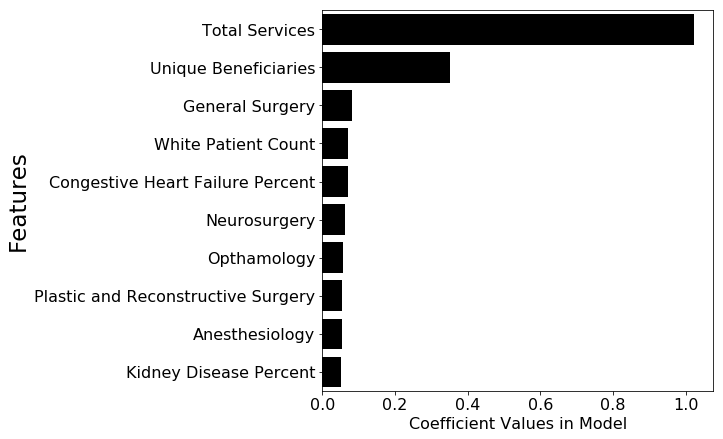

In [21]:
plt.figure(figsize=(7,7))
sns.barplot(y=top_10_features.iloc[:,0],x=top_10_features.iloc[:,1], orient="h", color="black")
plt.xlabel('Coefficient Values in Model', fontsize=16)
plt.yticks(ticks=range(10), labels=['Total Services','Unique Beneficiaries','General Surgery',
                                    'White Patient Count','Congestive Heart Failure Percent',
                                    'Neurosurgery','Opthamology','Plastic and Reconstructive Surgery',
                                    'Anesthesiology','Kidney Disease Percent'])
plt.ylabel('Features', fontsize=23)
plt.tick_params(axis='both', which='major', labelsize=16);

In [13]:
# Most Important Specialties
top_specialties = []
for ix, row in enumerate(ridge_coeffs_sort):
    if 'PROV' in ridge_coeffs_sort[ix][0]:
        top_specialties.append(row)
print(top_specialties[:10])   

top_specialties = pd.DataFrame(top_specialties[:10])

[('PROVIDER_TYPE[T.General Surgery]', 0.071060694511161), ('PROVIDER_TYPE[T.Neurosurgery]', 0.06268353482883063), ('PROVIDER_TYPE[T.Ophthalmology]', 0.053710070958318236), ('PROVIDER_TYPE[T.Plastic and Reconstructive Surgery]', 0.05083538802897073), ('PROVIDER_TYPE[T.Thoracic Surgery]', 0.0444149889214587), ('PROVIDER_TYPE[T.Cardiac Surgery]', 0.04255934330407737), ('PROVIDER_TYPE[T.Psychologist, Clinical]', 0.038907293895724615), ('PROVIDER_TYPE[T.Anesthesiology]', 0.03517763657164971), ('PROVIDER_TYPE[T.Orthopedic Surgery]', 0.032845260090753184), ('PROVIDER_TYPE[T.Radiation Oncology]', 0.03052383369005079)]


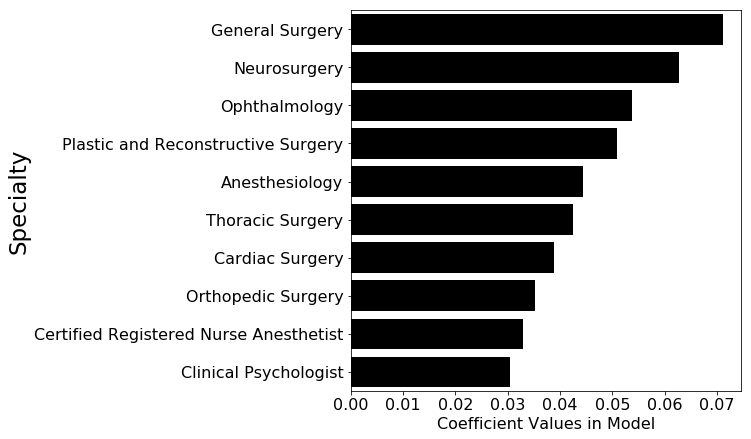

In [22]:
plt.figure(figsize=(7,7))
sns.barplot(y= top_specialties.iloc[:,0],x= top_specialties.iloc[:,1], orient="h", color="black")
plt.xlabel('Coefficient Values in Model', fontsize=16)
plt.yticks(ticks=range(10), labels=['General Surgery','Neurosurgery','Ophthalmology',
                   'Plastic and Reconstructive Surgery','Anesthesiology',
                   'Thoracic Surgery','Cardiac Surgery','Orthopedic Surgery',
                   'Certified Registered Nurse Anesthetist','Clinical Psychologist'])
plt.ylabel('Specialty', fontsize=23)
plt.tick_params(axis='both', which='major', labelsize=16);

In [15]:
# Most Important Medical Conditions
top_med = []
for ix, row in enumerate(ridge_coeffs_sort):
    if 'PERC' in ridge_coeffs_sort[ix][0]:
        top_med.append(row)
print(top_med[:10])   

top_med = pd.DataFrame(top_med[:10])

[('BENEFICIARY_CC_CHF_PERCENT', 0.07198090726026575), ('BENEFICIARY_CC_CKD_PERCENT', 0.056442998963214405), ('BENEFICIARY_CC_DEPR_PERCENT', 0.04955415654129275), ('BENEFICIARY_CC_IHD_PERCENT', 0.04326123083191404), ('BENEFICIARY_CC_CANCER_PERCENT', 0.03652982894304418), ('BENEFICIARY_CC_ALZRDSD_PERCENT', 0.029660612840168757), ('BENEFICIARY_CC_STRK_PERCENT', 0.02661859614967569), ('BENEFICIARY_CC_RAOA_PERCENT', 0.02639430202575987), ('BENEFICIARY_CC_HYPERL_PERCENT', 0.023783128537582934), ('BENEFICIARY_CC_OST_PERCENT', 0.007355686412990524)]


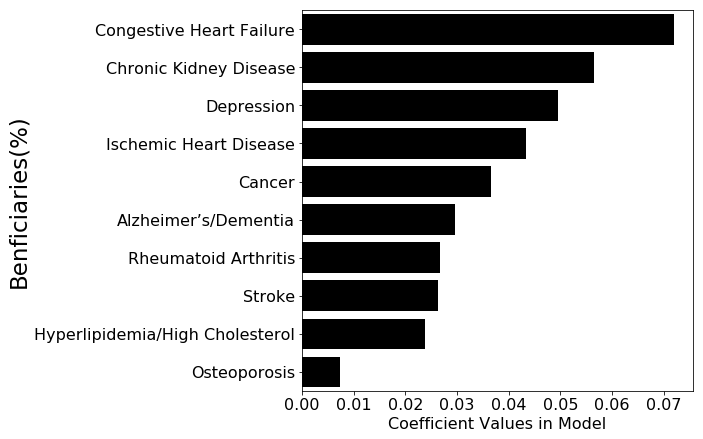

In [23]:
plt.figure(figsize=(7,7))
sns.barplot(y= top_med.iloc[:,0],x= top_med.iloc[:,1], orient="h", color="black")
plt.xlabel('Coefficient Values in Model', fontsize=16)
plt.yticks(ticks=range(10), labels=['Congestive Heart Failure','Chronic Kidney Disease','Depression',
                                    'Ischemic Heart Disease','Cancer','Alzheimer’s/Dementia',
                                    'Rheumatoid Arthritis','Stroke','Hyperlipidemia/High Cholesterol',
                                    'Osteoporosis'])
plt.ylabel('Benficiaries(%)', fontsize=23)
plt.tick_params(axis='both', which='major', labelsize=16);

In [17]:
# Most Important States
# All states have negative coefficients
top_states = []
for ix, row in enumerate(ridge_coeffs_sort):
    if 'STATE' in ridge_coeffs_sort[ix][0]:
        top_states.append(row)
print(top_states[:10])   

# top_states = pd.DataFrame(top_states[:10])

[('NPPES_PROVIDER_STATE[T.DC]', -0.011507908583872923), ('NPPES_PROVIDER_STATE[T.WY]', -0.011572722656154858), ('NPPES_PROVIDER_STATE[T.HI]', -0.011814259727756838), ('NPPES_PROVIDER_STATE[T.DE]', -0.01224697583850492), ('NPPES_PROVIDER_STATE[T.NV]', -0.013490878302104811), ('NPPES_PROVIDER_STATE[T.VT]', -0.014765520361303184), ('NPPES_PROVIDER_STATE[T.MT]', -0.014852719455995781), ('NPPES_PROVIDER_STATE[T.NH]', -0.01710626474982653), ('NPPES_PROVIDER_STATE[T.RI]', -0.01770059579461726), ('NPPES_PROVIDER_STATE[T.MD]', -0.019041629520697045)]


In [18]:
# Bottom 10 States
# Could also possibly be interpreted as 
# the cheapest states for Medicare
top_states[40:]

[('NPPES_PROVIDER_STATE[T.KY]', -0.050056540270369536),
 ('NPPES_PROVIDER_STATE[T.FL]', -0.05024217046215995),
 ('NPPES_PROVIDER_STATE[T.WI]', -0.05117854074762153),
 ('NPPES_PROVIDER_STATE[T.MN]', -0.05264222668587733),
 ('NPPES_PROVIDER_STATE[T.TN]', -0.05310252429230598),
 ('NPPES_PROVIDER_STATE[T.NC]', -0.05339467627461935),
 ('NPPES_PROVIDER_STATE[T.MI]', -0.05707948143215172),
 ('NPPES_PROVIDER_STATE[T.PA]', -0.05800430225728373),
 ('NPPES_PROVIDER_STATE[T.OH]', -0.0631472246379141),
 ('NPPES_PROVIDER_STATE[T.TX]', -0.0696753539832348)]

In [19]:
# Race Coefficients
top_r = []
for ix, row in enumerate(ridge_coeffs_sort):
    if 'RACE' in ridge_coeffs_sort[ix][0]:
        top_r.append(row)
print(top_r[:10])   

top_r = pd.DataFrame(top_r[:10])

[('BENEFICIARY_RACE_WHITE_COUNT', 0.08107363665274994), ('BENEFICIARY_RACE_BLACK_COUNT', 0.0135341523554897), ('BENEFICIARY_RACE_API_COUNT', 0.013219407894388375), ('BENEFICIARY_RACE_HISPANIC_COUNT', 0.01001394707176229), ('BENEFICIARY_RACE_NATIND_COUNT', 0.00015951198987167894), ('BENEFICIARY_RACE_OTHER_COUNT', -0.0007086765932922874)]


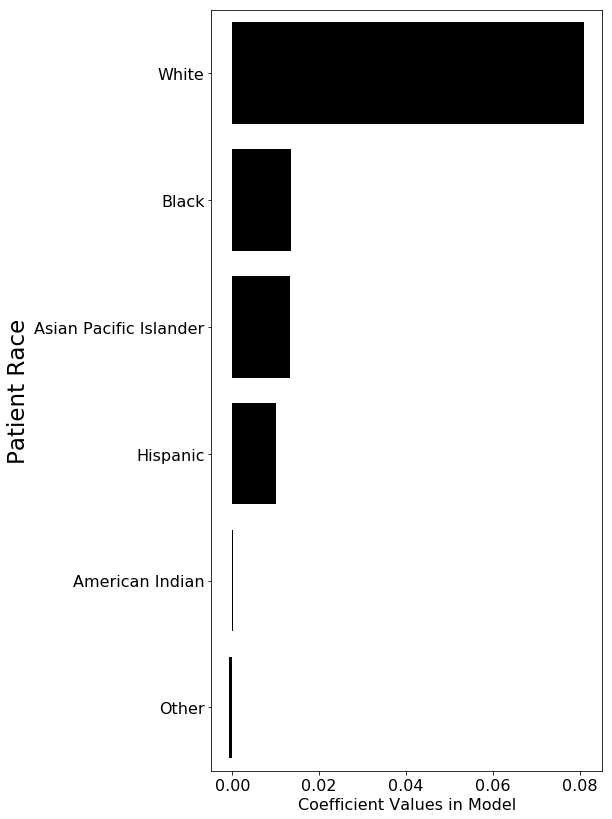

In [20]:
plt.figure(figsize=(7,14))
sns.barplot(y= top_r.iloc[:,0],x= top_r.iloc[:,1], orient="h", color="black")
plt.xlabel('Coefficient Values in Model', fontsize=16)
plt.yticks(ticks=range(6), labels=['White','Black','Asian Pacific Islander',
                                    'Hispanic','American Indian','Other'])
plt.ylabel('Patient Race', fontsize=23)
plt.tick_params(axis='both', which='major', labelsize=16);